# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [30]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [5]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [6]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-6-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [7]:
#merged_data.dtypes

In [8]:
pollution_data = merged_data[['pm10','neighborhood']]
pollution_data.head(5)

,pm10,neighborhood
0,11.35,Bronx Park
1,1.18,Bronx Park
2,0.76,Bronx Park
3,47.36,Bronx Park
4,6.18,Bronx Park


In [9]:
pollution_data.shape[0]

118495

In [10]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [11]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [12]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [13]:
pollution_data['pm10'].min()

0.0

In [14]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [15]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [16]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [17]:
joined_table = joined_table.where('pm10', are.below(300))

In [18]:
len(joined_table)

2

In [19]:
joined_table.num_rows

117356

In [ ]:
# 1.1 sampling of 10% without replacement
sample_size = int(0.1 * joined_table.num_rows)
sample_10_percent = joined_table.sample(k=sample_size, with_replacement=False)

# 1.2 Compute mean
sample_mean_pm10 = np.mean(sample_10_percent.column('pm10'))
print("Mean PM10 value of 10% sample:", sample_mean_pm10)

# 1.3 Plot histogram of sample
sample_10_percent.hist('pm10', bins=10)
plt.title('Empirical Histogram of Sampled PM10 (10%)')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

# 1.4 Plot histogram of full dataset
joined_table.hist('pm10', bins=10)
plt.title('Empirical Histogram of Full PM10 Dataset')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('Frequency')
plt.show()


## **Comment on the shape of the histogram and compare it to the distribution of the full dataset.**

Shape:
Both histograms (sampled 10% and full dataset) are right-skewed (positively skewed).
Most PM10 values are concentrated near low values (between 0 and 50 μg/m³), while higher values (above 100 μg/m³) are much rarer.

Comparison:
The sampled data (10%) closely resembles the shape of the full dataset:

The general pattern of high frequency at lower PM10 values and a long tail toward higher values is preserved.


Conclusion:
Random sampling of 10% without replacement maintains the overall distribution shape.
This suggests that the 10% sample is representative of the full dataset in terms of PM10 distribution.



## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [ ]:

# 2.1 Define bootstrap method to estimate the median pm10 value for the entire dataset.
def bootstrap_median():
    bootstrap_sample = joined_table.sample()
    resampled_median = np.median(bootstrap_sample.column('pm10'))
    return resampled_median

# 2.2 Generate 5,000 bootstrap samples and compute the median for each sample.
num_samples = 5000
boot_medians = make_array()

for i in np.arange(num_samples):
    one_median = bootstrap_median()
    boot_medians = np.append(boot_medians, one_median)

# 2.3 Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
lower_bound = percentile(2.5, boot_medians)
upper_bound = percentile(97.5, boot_medians)

print("95% Confidence Interval for the median PM10:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# 2.4 Visualize the results by drawing an empirical histogram of the bootstrapped medians.
Table().with_column('Bootstrapped Medians', boot_medians).hist('Bootstrapped Medians', bins=30)
plt.title('Empirical Histogram of Bootstrapped Medians')
plt.xlabel('Median PM10 (µg/m³)')
plt.ylabel('Frequency')

# Overlaying the confidence interval on the horizontal axis.
plt.plot([lower_bound, upper_bound], [0, 0], color='yellow', lw=8);
plt.legend()
plt.show()

## **Report the confidence interval and interpret what it means in the context of air quality.**

After performing 5,000 bootstrap resamples, we constructed a 95% confidence interval for the population median PM10 value.

The resulting interval is: [3.10 µg/m³, 3.19 µg/m³]

We are 95% confident that the true median PM10 concentration in the population lies between 3.10 µg/m³ and 3.19 µg/m³.

which means, if we were to repeat this entire process many times, about 95% of the intervals we compute would capture the true median.


## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [ ]:
# 3.1 Define a function for one bootstrap mean, and Generate 5,000 bootstrap samples and compute the mean for each sample.
def bootstrap_mean():
    bootstrap_sample = joined_table.sample()
    resampled_mean = np.mean(bootstrap_sample.column('pm10'))
    return resampled_mean


num_samples = 5000
boot_means = make_array()

for i in np.arange(num_samples):
    one_mean = bootstrap_mean()
    boot_means = np.append(boot_means, one_mean)

# 3.2 Calculate 95% Confidence Interval for Mean.
lower_bound = percentile(2.5, boot_means)
upper_bound = percentile(97.5, boot_means)

print("95% Confidence Interval for the mean PM10:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# 3.3 Visualize the results by drawing an empirical histogram of the bootstrapped means.
Table().with_column('Bootstrapped Means', boot_means).hist('Bootstrapped Means', bins=30)
plt.title('Empirical Histogram of Bootstrapped Means')
plt.xlabel('Mean PM10 (µg/m³)')
plt.ylabel('Frequency')

# Overlay the confidence interval
plt.plot([lower_bound, upper_bound], [0, 0], color='yellow', lw=8);

# Overlay the hypothesized value 20  μg/m³
plt.axvline(20, color='blue', linestyle=':', label='Hypothesized Mean = 20')
plt.legend()
plt.show()



## **Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.**

We constructed a 95% confidence interval for the population mean PM10: [15.96 µg/m³, 16.39 µg/m³]

The hypothesized mean PM10 value under the null hypothesis was 20 µg/m³.

However, 20 is far outside the confidence interval. And since 20 is not inside the 95% confidence interval,we reject the null hypothesis (H₀) at the 5% significance level. This means there is strong evidence that the true average PM10 level in the population is different from 20 µg/m³. In fact, the data suggest that the actual average PM10 concentration is much lower than 20 µg/m³.

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [26]:
#4.1
#Find Top 3 Neighborhoods
# Group the joined_table by neighborhood and calculate mean PM10
grouped_means = joined_table.group('neighborhood', np.mean)

# Sort by highest mean PM10
top3_neighborhoods = grouped_means.sort('pm10 mean', descending=True).take(np.arange(3))

# Show the top 3
top3_neighborhoods


neighborhood,pm10 mean
Crotona Park,53.4512
Pelham Bay,34.6071
Tremont,29.829


In [27]:
#Define a Bootstrap Function for Neighborhood Mean
# Function to perform one bootstrap for a specific neighborhood
def bootstrap_mean_neighborhood(neighborhood_name):
    subset = joined_table.where('neighborhood', are.equal_to(neighborhood_name))
    bootstrap_sample = subset.sample()
    resampled_mean = np.mean(bootstrap_sample.column('pm10'))
    return resampled_mean

#Bootstrap 5000 Samples for Each Neighborhood
num_samples = 5000

# Create a dictionary to hold results
neighborhood_bootstrap_means = {}

for neighborhood in top3_neighborhoods.column('neighborhood'):
    boot_means = make_array()
    for i in np.arange(num_samples):
        one_mean = bootstrap_mean_neighborhood(neighborhood)
        boot_means = np.append(boot_means, one_mean)
    neighborhood_bootstrap_means[neighborhood] = boot_means

<ipython-input-31-bb6b3c3ea512>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


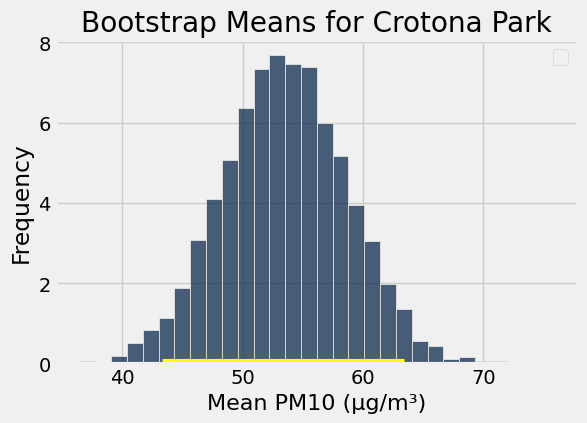

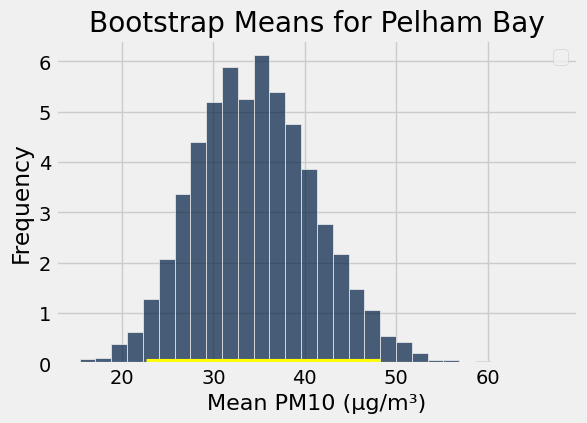

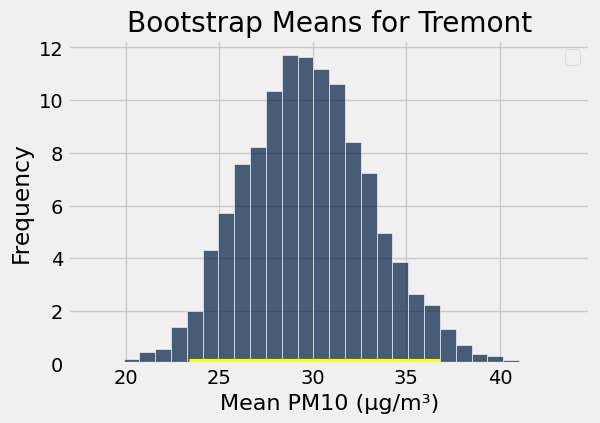

In [31]:
#4.2
#Plot Histograms + Confidence Intervals
for neighborhood, boot_means in neighborhood_bootstrap_means.items():

    # Calculate CI
    lower_bound = percentile(2.5, boot_means)
    upper_bound = percentile(97.5, boot_means)

    # Plot
    Table().with_column('Bootstrapped Means', boot_means).hist('Bootstrapped Means', bins=30)
    plt.title(f'Bootstrap Means for {neighborhood}')
    plt.xlabel('Mean PM10 (µg/m³)')
    plt.ylabel('Frequency')
    #4.3
    # Add horizontal CI lines
    plt.plot([lower_bound, upper_bound], [0, 0], color='yellow', lw=8);
    plt.legend()
    plt.show()



# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.